In [2]:
import pandas as pd
import matplotlib
import numpy as np
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('/Users/nupursolanki/Desktop/machine_learning_modelling/data/creditcard.csv')

In [5]:
class_count = data['Class'].value_counts()
print(class_count)

0    284315
1       492
Name: Class, dtype: int64


In [6]:
d1 = data.loc[(data['Amount']>2000) & (data['Class'] ==1)]

We will keep only data where amount is less than 10000 to remove outliers.

In [7]:
data=data.loc[data['Amount']<8000]

In [8]:
fraud_df = data.loc[data['Class']==1]
fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


## Case 1 : 


Sampling Techniques:

There is a severe skew in class distribution due to which we need to create a sample that has an equal number of fraud and non fraud transactions. Sampling essentially does that. It means to randomly select observations and have a sample size such that you get a symmetric class distribution.  
I use 2 sampling techniques to check which one gives better results. 
We can try reducing the sample size by using random undersampling i.e in our case randomly select 492 non fraud transactions from the training sample to match the 492 fraudulent transactions so we have a sample size equal to 984 observations. So random undersampling involves randomly deleting observations from the majority class.


In [16]:
#Sampling to solve the imbalance data issue: SMOTE and imblearn random undersampling
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
X = data
y = data['Class']

print('Original dataset shape {}'.format(Counter(y)))
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284303, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


We have 984 rows in udersampled data. We will display that.

In [17]:
from sklearn.model_selection import train_test_split

train_data = X_res.loc[:,data.columns!="Class"]
print(y_res.shape)

(984,)


We will now divide the undersampled data into train test split with test size as 30%

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_data, 
                                                    y_res, 
                                                    stratify = y_res, 
                                                    test_size = 0.3, 
                                                    random_state = 42)


We are done with sampling. We now apply scaling to standardize the amount and time columns.

In [19]:
from sklearn.preprocessing import StandardScaler

for col in ["Amount", "Time"]:
    scaler = StandardScaler()
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1, 1))

<ipython-input-19-1928d3505c25>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1, 1))
<ipython-input-19-1928d3505c25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = scaler.transform(X_test[col].values.reshape(-1, 1))
<ipython-input-19-1928d3505c25>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

We now have the data ready. We apply random forest classifier on training data.

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42, n_jobs = -1)
rfc.fit(X_train,y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

Predict using the test data

In [22]:
y_predict = pd.DataFrame(rfc.predict(X_test))

We now measure performance using confusion matrix and ROC curves

In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat_rus = confusion_matrix(y_test,y_predict)
print(confusion_mat_rus)

[[143   5]
 [ 12 136]]


In [26]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
print(tn,fp,fn,tp)

143 5 12 136


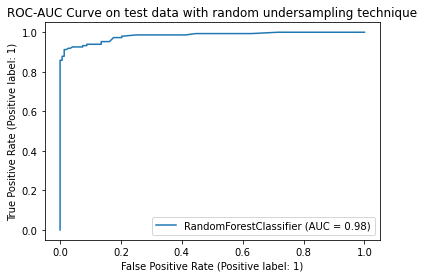

In [28]:
#ROC curve
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax)
plt.title('ROC-AUC Curve on test data with random undersampling technique')
plt.show()


We will now do the same with oversampling

In [30]:
#Oversampled dataset
#Resampling
from imblearn.over_sampling import RandomOverSampler
X = data
y = data['Class']
ros = RandomOverSampler(random_state=42)
# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_ros)))

train_data1 = x_ros.loc[:,data.columns!="Class"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_data1, 
                                                    y_ros, 
                                                    stratify = y_ros, 
                                                    test_size = 0.3, 
                                                    random_state = 42)


Original dataset shape Counter({0: 284303, 1: 492})
Resampled dataset shape Counter({0: 284303, 1: 284303})


In [31]:
from sklearn.preprocessing import StandardScaler

for col in ["Amount", "Time"]:
    scaler = StandardScaler()
    X_train1[col] = scaler.fit_transform(X_train1[col].values.reshape(-1, 1))
    X_test1[col] = scaler.transform(X_test1[col].values.reshape(-1, 1))

<ipython-input-31-a6545378d582>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train1[col] = scaler.fit_transform(X_train1[col].values.reshape(-1, 1))
<ipython-input-31-a6545378d582>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test1[col] = scaler.transform(X_test1[col].values.reshape(-1, 1))
<ipython-input-31-a6545378d582>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [32]:
rfc1 = RandomForestClassifier(random_state = 42, n_jobs = -1)
rfc1.fit(X_train1,y_train1)
y_predict1 = pd.DataFrame(rfc1.predict(X_test1))


[[143   5]
 [ 12 136]]


In [34]:
confusion_mat_ros = confusion_matrix(y_test1,y_predict1)
print(confusion_mat_ros)

tn, fp, fn, tp = confusion_matrix(y_test1,y_predict1).ravel()



[[85284     7]
 [    0 85291]]


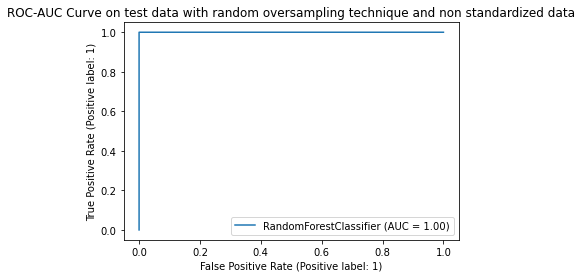

In [42]:
rfc_disp1 = plot_roc_curve(rfc1, X_test1, y_test1)
plt.title('ROC-AUC Curve on test data with random oversampling technique')
plt.show()

In [35]:
#SMOTE sampling dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))



Original dataset shape Counter({0: 284303, 1: 492})
Resample dataset shape Counter({0: 284303, 1: 284303})


In [36]:
train_data2 = x_smote.loc[:,data.columns!="Class"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_data2, 
                                                    y_smote, 
                                                    stratify = y_smote, 
                                                    test_size = 0.3, 
                                                    random_state = 42)


In [ ]:
for col in ["Amount", "Time"]:
    scaler = StandardScaler()
    X_train2[col] = scaler.fit_transform(X_train2[col].values.reshape(-1, 1))
    X_test2[col] = scaler.transform(X_test2[col].values.reshape(-1, 1))

In [38]:
rfc2 = RandomForestClassifier(random_state = 42, n_jobs = -1)
rfc2.fit(X_train2,y_train2)
y_predict2 = pd.DataFrame(rfc2.predict(X_test2))



[[85273    18]
 [    3 85288]]


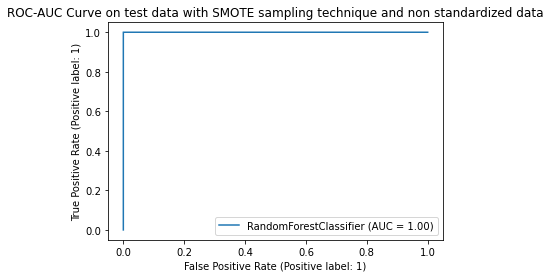

In [39]:
confusion_mat_smote = confusion_matrix(y_test2,y_predict2)
print(confusion_mat_smote)

tn, fp, fn, tp = confusion_matrix(y_test2,y_predict2).ravel()

ax = plt.gca()
rfc_disp2 = plot_roc_curve(rfc2, X_test2, y_test2, ax=ax)
plt.title('ROC-AUC Curve on test data with SMOTE sampling technique')
plt.show()


For logisitc we will use X_train an dy_train that we had used for random undersampling in random forests


knn
tree
xgboost


In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
ylogit_predict = pd.DataFrame(clf.predict(X_test))


[[145   3]
 [ 11 137]]


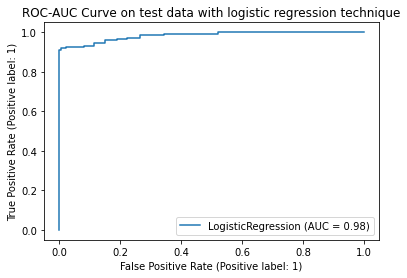

In [42]:
#confusion matrix and ROC
confusion_mat_logit = confusion_matrix(y_test,ylogit_predict)
print(confusion_mat_logit)
lr_disp = plot_roc_curve(clf, X_test, y_test)
plt.title('ROC-AUC Curve on test data with logistic regression technique')
plt.show()

In [45]:
clf.predict_proba(X_test)
clf.score(X_train, y_train)

0.9534883720930233

In [46]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

In [52]:
ydtc_predict = pd.DataFrame(dtc.predict(X_test))

[[135  13]
 [  9 139]]


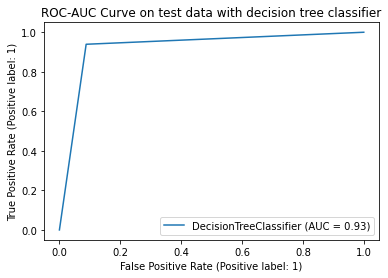

In [53]:
confusion_mat_dtc = confusion_matrix(y_test,ydtc_predict)
print(confusion_mat_dtc)
dtc_disp = plot_roc_curve(dtc, X_test, y_test)
plt.title('ROC-AUC Curve on test data with decision tree classifier')
plt.show()